# Projeto 2 - Ciência dos Dados

Nome: Eduardo Janes Vescovi <br />
Nome: Fabio Dotoli Ferreira Filho <br />
Nome: José Rafael Martins Fernandes <br />
Nome: Lucca Barufatti Velini Sanches

## Proposta do projeto:

### Carregando algumas bibliotecas:

In [50]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics
from math import *
from IPython.display import display
pd.options.display.max_rows = 13

### Localizando o arquivo

In [51]:
filename = 'car.data'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com o projeto!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

Encontrei o arquivo car.data, tudo certo para prosseguir com o projeto!


### Carregando o arquivo

In [52]:
nomes_colunas = ['Buying', 'Maint', 'Doors', 'Capacity', 'Lug_boot', 'Safety', 'Car_acceptability']
cars = pd.read_csv(filename, names=nomes_colunas)
cars

,Buying,Maint,Doors,Capacity,Lug_boot,Safety,Car_acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


### Análise Exploratória Inicial

In [53]:
#Colunas do dataset
buying = cars.Buying
maint = cars.Maint
doors = cars.Doors
capacity = cars.Capacity
lug_boot = cars.Lug_boot
safety = cars.Safety
car_acceptability = cars.Car_acceptability

high     432
low      432
vhigh    432
med      432
Name: Buying, dtype: int64

high     0.25
low      0.25
vhigh    0.25
med      0.25
Name: Buying, dtype: float64

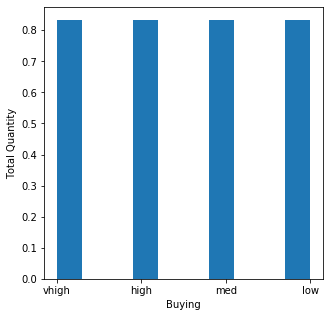

In [54]:
#Buying
display(buying.value_counts()) 
display(buying.value_counts(True))
 
plt.figure(figsize=(5, 5))

plt.hist(buying, density = True)
plt.xlabel('Buying')
plt.ylabel('Total Quantity')
plt.show()

high     432
low      432
vhigh    432
med      432
Name: Maint, dtype: int64

high     0.25
low      0.25
vhigh    0.25
med      0.25
Name: Maint, dtype: float64

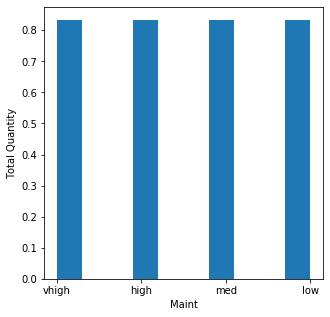

In [55]:
#Maint
display(maint.value_counts()) 
display(maint.value_counts(True))

plt.figure(figsize=(5, 5))

plt.hist(maint, density = True)
plt.xlabel('Maint')
plt.ylabel('Total Quantity')
plt.show()

4        432
2        432
5more    432
3        432
Name: Doors, dtype: int64

4        0.25
2        0.25
5more    0.25
3        0.25
Name: Doors, dtype: float64

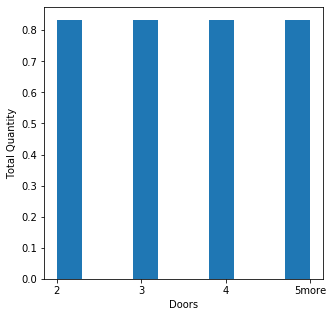

In [56]:
#Doors
display(doors.value_counts()) 
display(doors.value_counts(True))

plt.figure(figsize=(5, 5))

plt.hist(doors, density = True)
plt.xlabel('Doors')
plt.ylabel('Total Quantity')
plt.show()

4       576
more    576
2       576
Name: Capacity, dtype: int64

4       0.333333
more    0.333333
2       0.333333
Name: Capacity, dtype: float64

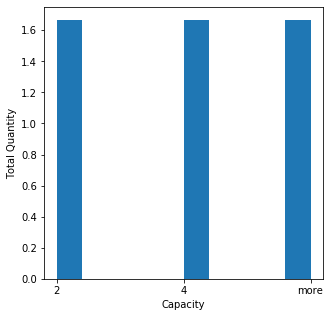

In [57]:
#Capacity
display(capacity.value_counts()) 
display(capacity.value_counts(True))

plt.figure(figsize=(5, 5))

plt.hist(capacity, density = True)
plt.xlabel('Capacity')
plt.ylabel('Total Quantity')
plt.show()

big      576
small    576
med      576
Name: Lug_boot, dtype: int64

big      0.333333
small    0.333333
med      0.333333
Name: Lug_boot, dtype: float64

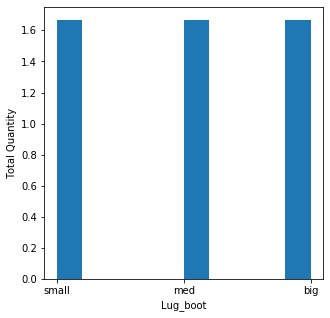

In [58]:
#Lug_boot
display(lug_boot.value_counts()) 
display(lug_boot.value_counts(True))

plt.figure(figsize=(5, 5))

plt.hist(lug_boot, density = True)
plt.xlabel('Lug_boot')
plt.ylabel('Total Quantity')
plt.show()

high    576
low     576
med     576
Name: Safety, dtype: int64

high    0.333333
low     0.333333
med     0.333333
Name: Safety, dtype: float64

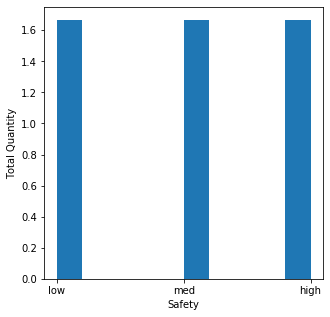

In [59]:
#Safety
display(safety.value_counts()) 
display(safety.value_counts(True))

plt.figure(figsize=(5, 5))

plt.hist(safety, density = True)
plt.xlabel('Safety')
plt.ylabel('Total Quantity')
plt.show()

unacc    1210
acc       384
good       69
vgood      65
Name: Car_acceptability, dtype: int64

unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: Car_acceptability, dtype: float64

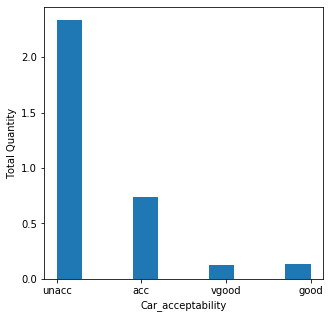

In [60]:
#Car_acceptability
display(car_acceptability.value_counts()) 
display(car_acceptability.value_counts(True))

plt.figure(figsize=(5, 5))

plt.hist(car_acceptability, density = True)
plt.xlabel('Car_acceptability')
plt.ylabel('Total Quantity')
plt.show()

### Iniciando classificação

In [61]:
#Substituindo dados categoricos por valores ordinais
buying_maint_dici = {'vhigh': '4', 'high': '3', 'med': '2', 'low': '1'}
doors_dici = {'2':'2', '3':'3', '4':'4','5more': '5'}
capacity_dici = {'2':'2', '4':'4', 'more': '3'}
lug_boot_dici = {'small': '1', 'med': '2', 'big': '3'}
safety_dici = {'low': '1', 'med': '2', 'high': '3'}
car_acceptability_dici = {'unacc':'1', 'acc':'2', 'good':'3', 'vgood':'4'}

cars['Buying'].replace(buying_maint_dici, inplace=True)
cars['Maint'].replace(buying_maint_dici, inplace=True)
cars['Doors'].replace(doors_dici, inplace=True)
cars['Capacity'].replace(capacity_dici, inplace=True)
cars['Lug_boot'].replace(lug_boot_dici, inplace=True)
cars['Safety'].replace(safety_dici, inplace=True)
cars['Car_acceptability'].replace(car_acceptability_dici, inplace=True)

cars = cars.apply(pd.to_numeric)

In [62]:
variaveis_independentes = ['Buying', 'Maint', 'Doors', 'Capacity', 'Lug_boot', 'Safety']
x = cars[variaveis_independentes] 
y = car_acceptability

In [63]:
#Dividindo o dataset em treino e teste
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.25, random_state=0)

In [66]:
#Fazendo a classificação
modelo = sklearn.linear_model.LogisticRegression(solver='lbfgs', max_iter=10000) #Criando modelo de regressão logística
modelo.fit(x_train,y_train) #Treinando modelo
y_pre = modelo.predict(x_test) #Fazendo a predição

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [65]:
#Resultados da predição
resultados = sklearn.metrics.classification_report(y_test, y_pre, output_dict=True)
df_result = pd.DataFrame(resultados).T
df_result['support'] = df_result['support'].apply(int)
df_result = df_result.rename(index={'1':'unacc', '2':'acc', '3':'good', '4':'vgood'})
print('----Resultados da Regressão Logística----')
display(df_result)

----Resultados da Regressão Logística----


,precision,recall,f1-score,support
unacc,0.862805,0.956081,0.907051,296
acc,0.589474,0.565657,0.577320,99
good,0.200000,0.047619,0.076923,21
vgood,0.750000,0.187500,0.300000,16
accuracy,0.793981,0.793981,0.793981,0
macro avg,0.600570,0.439214,0.465323,432
weighted avg,0.763769,0.793981,0.768651,432
